**Markov Chain Monte Carlo - Metropolis**

**1 Single Neuron aka. Logistic Regression**

[[2.71196216 1.39726601]
 [1.5742503  1.31864739]
 [1.41180315 0.79804554]]
(200, 1)
(100, 1)


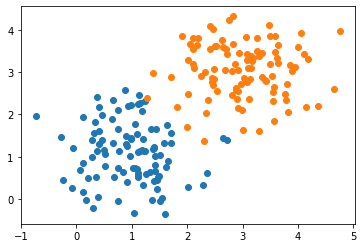

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# generate gaussian toy data
np.random.seed(101)

d = 2
n = 100
mu1 = [1, 1]
mu2 = [3, 3]
sigma_diag = 0.4
cov = [[sigma_diag, 0], [0, sigma_diag]]
X1 = np.random.multivariate_normal(mu1, cov, size=n)
X2 = np.random.multivariate_normal(mu2, cov, size=n)
Y1 = np.full((n,1), 1)
Y2 = np.full((n,1), 0)
# X = np.concatenate((np.full((2*n,1), 1), np.concatenate((X1, X2), axis=0)), axis=1)
X =  np.concatenate((X1, X2), axis=0)
Y = np.concatenate((Y1, Y2), axis=0)
print(X[0:3])
print(Y.shape)

print(Y1.shape)

plt.scatter(X1[:,0], X1[:,1])
plt.scatter(X2[:,0], X2[:,1])
plt.show()

def MCMC(function, X, Y, N, d, sigma=0.1):
    mu0 = [0]*d
    cov = np.diag([sigma]*d)
    w_old = np.random.multivariate_normal(mu0, cov)
    sample_list = []
    for i in range(N):
        w_new = np.random.multivariate_normal(w_old, cov)
        a = np.exp(function(X, Y, w_new) - function(X, Y, w_old))
        u = np.random.uniform(0, 1)
        if (a > u):
            sample_list.append(w_new)
            w_old = w_new
    return np.array(sample_list)

(3000, 3)


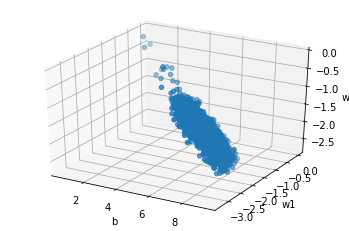

In [3]:
def sigmoid_layer(X, W):
    x_biases = np.full((X.shape[0],1), 1)
    X_ = np.concatenate((x_biases, X), axis=1)
    odds = np.exp(-np.dot(X_, W.T))
    y_hat = 1/(1 + odds)
    return y_hat
def log_posterior_over_parameters_logreg(X, Y, W):
    sigma_prior = 1.5
    log_prior = (-np.dot(W, W.T)/(2*sigma_prior**2))
    y_hat = sigmoid_layer(X, W)
    full_log_likelihood = (Y.T)*np.log(y_hat) + (1 - Y.T)*np.log(1-y_hat)
    post = log_prior + np.sum(full_log_likelihood)
    return post

W_samples = MCMC(log_posterior_over_parameters_logreg, X, Y, N=10000, d=3)

print(W_samples.shape)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(W_samples[:,0], W_samples[:,1], W_samples[:,2])
ax.set_xlabel('b')
ax.set_ylabel('w1')
ax.set_zlabel('w2')
plt.show()

X_pred.shape (125250, 2)
W_samples.shape (3000, 3)
y_pred_full.shape (125250,)
classes [0.99981771 0.99981643 0.99981514 0.99981382 0.99981247]


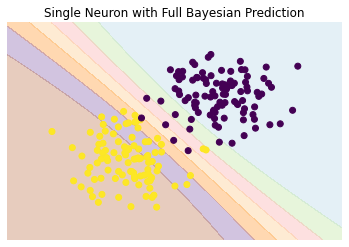

W_map.shape (1, 3)
y_pred_map.shape (125250, 1)


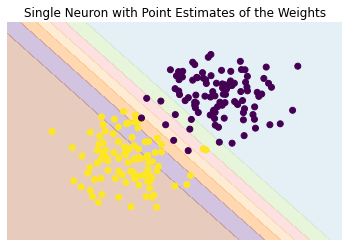

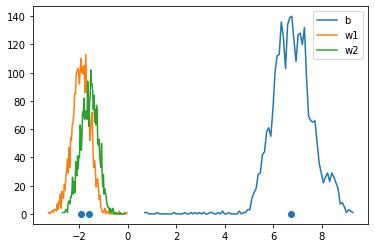

In [4]:
def predict_MC(X, W_samples):
    return (np.nansum(sigmoid_layer(X, W_samples), axis=1)/W_samples.shape[0])

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
fig, ax = plt.subplots()
X_pred = np.concatenate((xx.ravel().reshape(-1,1), yy.ravel().reshape(-1,1)), axis=1)
y_pred_full = predict_MC(X_pred, W_samples)


print("X_pred.shape", X_pred.shape)
print("W_samples.shape", W_samples.shape)
print("y_pred_full.shape", y_pred_full.shape)
print("classes", y_pred_full[0:5])

# Put the result into a color plot
y_pred_full = y_pred_full.reshape(xx.shape)
ax.contourf(xx, yy, y_pred_full, cmap=plt.cm.Paired, alpha=0.3) 
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=Y)

ax.set_title('Single Neuron with Full Bayesian Prediction')
plt.show()

# POINT ESTIMATE
W_map = np.median(W_samples, axis=0).reshape(1, -1)
y_pred_map = sigmoid_layer(X_pred, W_map)


print("W_map.shape", W_map.shape)
print("y_pred_map.shape", y_pred_map.shape)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
fig, ax = plt.subplots()
# Put the result into a color plot
y_pred_map = y_pred_map.reshape(xx.shape)
ax.contourf(xx, yy, y_pred_map, cmap=plt.cm.Paired, alpha=0.3) 
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=Y)

ax.set_title('Single Neuron with Point Estimates of the Weights')
plt.show()

# Marginals of the Weights
bins = 100
p_b, b_hist = np.histogram(W_samples[:,0], bins=bins)
p_w1, w1_hist = np.histogram(W_samples[:,1], bins=bins)
p_w2, w2_hist = np.histogram(W_samples[:,2], bins=bins)
plt.show()
plt.scatter(W_map, W_map.shape[1]*[0])
b_plt, = plt.plot(b_hist[1:], p_b, label="b")
w1_plt, = plt.plot(w1_hist[1:], p_w1, label="w1")
w2_plt, = plt.plot(w2_hist[1:], p_w2, label="2")
plt.legend([b_plt, w1_plt , w2_plt], ["b", "w1", "w2"])
plt.show()


**2 Neural Network** 

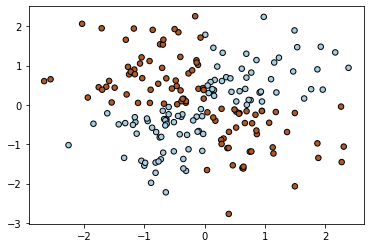

In [5]:
# generate XOR data
xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)
X = rng.randn(200, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
                edgecolors=(0, 0, 0))
plt.show()


In [9]:
# 2 inputs, hidden layer 3 neurons, W1.shape = (3,3), second layer 1 neuron, W2.shape = (1,4)
def relu_layer(X, W):
    x_biases = np.full((X.shape[0],1), 1)
    X_ = np.concatenate((x_biases, X), axis=1)
    Z = np.dot(X_, W.T)
    U = np.maximum(Z, 0)
    return U
def sigmoid_layer(X, W):
    x_biases = np.full((X.shape[0],1), 1)
    X_ = np.concatenate((x_biases, X), axis=1)
    odds = np.exp(-np.dot(X_, W.T))
    y_hat = 1/(1 + odds)
    return y_hat

def log_posterior_mlp(X, Y, W):
    W1 = W[:-4].reshape(3, 3)
    W2 = W[-4:]
    sigma_prior = 5
    log_prior = -np.dot(W, W.T)/(2*sigma_prior**2)
    U = relu_layer(X, W1)
    y_hat = sigmoid_layer(U, W2)
    full_log_likelihood = (Y.T) * np.log(y_hat) + (1 - Y.T) * np.log(1-y_hat)
    post = log_prior + np.sum(full_log_likelihood)
    return post

W_samples = MCMC(log_posterior_mlp, X, Y, N=10000, d=13)
print("W_samples.shape", W_samples.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in multiply


W_samples.shape (249, 13)


(124256, 1) (124256, 1)


Text(0.5, 1.0, 'Simple Neural Network with Point Estimates of Weights')

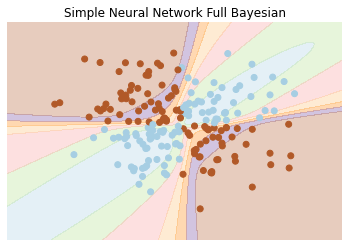

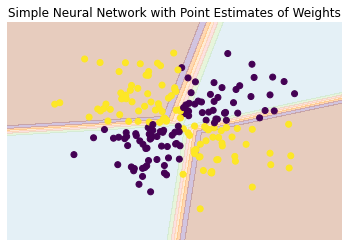

In [10]:
def nn_layer_samples(X, W):
    X_ = np.concatenate((np.full((X.shape[0], 1, X.shape[2]), 1), X), axis=1)
    print("X_.shape =", X_.shape)
    odds1 = np.exp(np.dot(W.T, X_))
    U = odds1/(1 + odds1)
    return U
def predict_MC(X, W_samples):
    W1 = W_samples[:,:-4].reshape(3, 3, W_samples.shape[0])
    W2 = W_samples[:,-4:].T
    # U = relu_layer(X, W1).reshape((-1, 3, 124256))
    # Y = nn_layer_samples(U, W2)
    # print("Y.shape = ", Y.shape)
    return (np.nansum(nn_layer_samples(relu_layer(X, W1).reshape((-1, 3, 124256)), W2), axis=0)/W_samples.shape[0])

def predict(X, W_map):
    W1 = W_map[:-4].reshape(3, 3)
    W2 = W_map[-4:].reshape(1, -1)
    U = relu_layer(X, W1)
    return (sigmoid_layer(U, W2))*1 # > 0.5


# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
X_pred = np.concatenate((xx.ravel().reshape(-1,1), yy.ravel().reshape(-1,1)), axis=1)

# Full Bayesian Prediction 
y_pred_full = np.zeros((X_pred.shape[0], 1))
for i in range(W_samples.shape[0]):
    W = W_samples[i]
    y_pred_full += predict(X_pred, W)/W_samples.shape[0]

# Bayesian Point Estimate Prediction
W_map = np.median(W_samples, axis=0)#.reshape(1, -1)
y_pred_map = predict(X_pred, W_map)

print(xx.ravel().reshape(-1,1).shape, yy.ravel().reshape(-1,1).shape)
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].


fig, ax = plt.subplots()
# Put the result into a color plot
y_pred_full = y_pred_full.reshape(xx.shape)
ax.contourf(xx, yy, y_pred_full, cmap=plt.cm.Paired, alpha=0.3)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)


ax.set_title('Simple Neural Network Full Bayesian')


fig, ax = plt.subplots()
# Put the result into a color plot
y_pred_map = y_pred_map.reshape(xx.shape)
ax.contourf(xx, yy, y_pred_map, cmap=plt.cm.Paired, alpha=0.3) 
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=Y)

ax.set_title('Simple Neural Network with Point Estimates of Weights')